In [1]:
%%capture

%run neuralsort_demo.ipynb
%run otsort_demo.ipynb
%run fastsort_demo.ipynb

In [2]:
import numpy as np
import pandas as pd

def plot(sx):
    pd.DataFrame(
        np.stack([i, sx]).T,
        columns=['x', 'min(softsort(x, 0))'],
    ).set_index('x').plot()

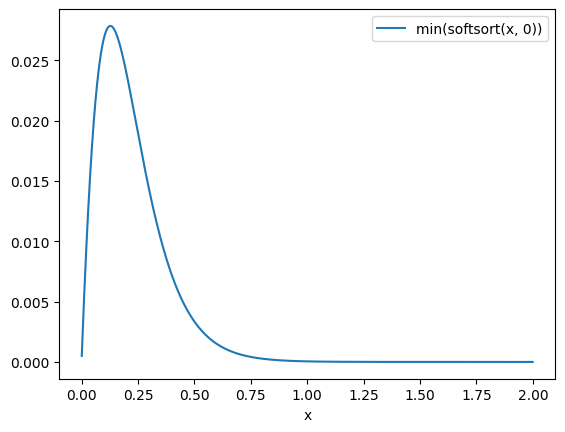

In [3]:
# neural_sort

i = tf.range(0.001, 2, 0.001).numpy()
x = tf.constant([[e, 0.] for e in i])
sx, sr = neural_sort(x)

plot(sx[:, 1].numpy())

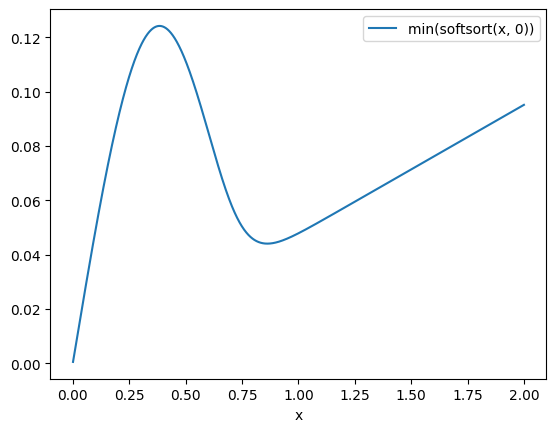

In [4]:
# ot_sort

sr, sx = ot_sort_batch(x)

plot(sx[:, 1].numpy())

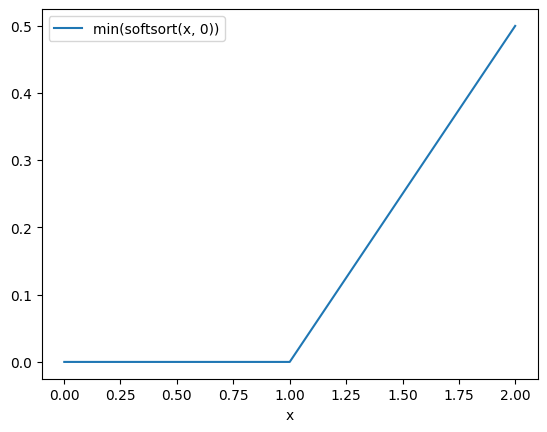

In [5]:
# fast_sort reg=1.0
sx = np.array(
    [soft_sort([e, 0], regularization_strength=1.0) for e in i]
)

plot(sx[:, 0])

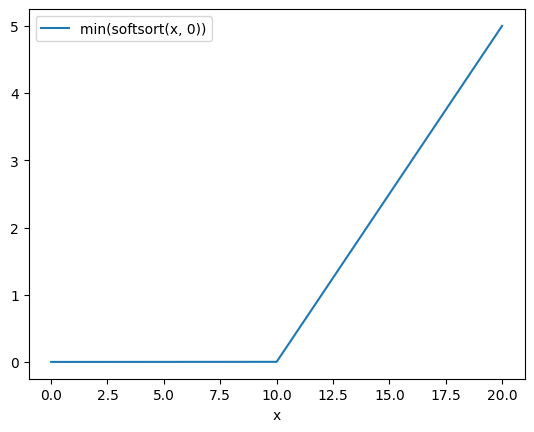

In [6]:
# fast_sort reg=0.1
i = np.arange(0.001, 20, 0.001)    
sx = np.array(
    [soft_sort([e, 0], regularization_strength=0.1) for e in i]
)
plot(sx[:, 0])